In [2]:
import pandas as pd

df = pd.read_csv("../data/raw.csv")

df.isna().sum().sort_values(ascending=False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There is no missing values in the data. It is already clean. We can move straight to EDA.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

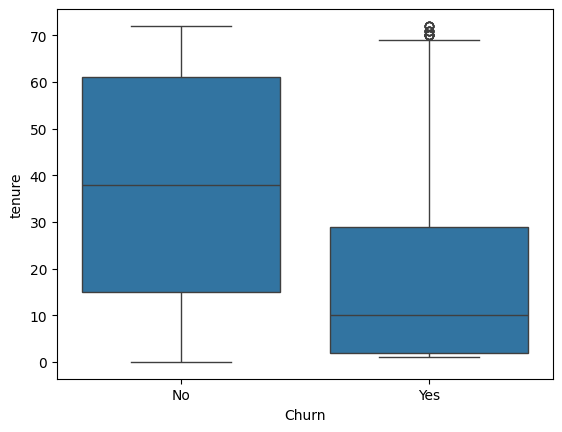

In [7]:
sns.boxplot(x = 'Churn', y = 'tenure', data = df)
plt.show()

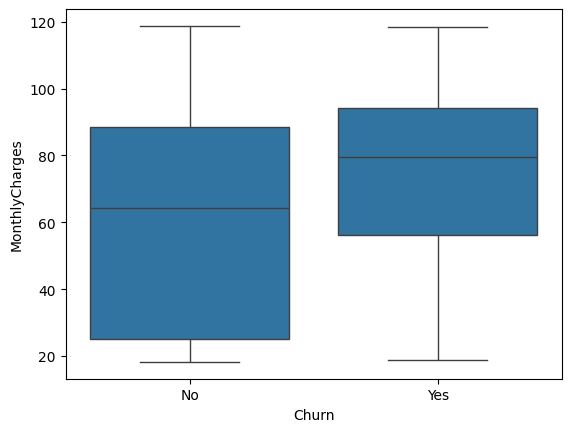

In [8]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.show()

Customers who churn tend to have significantly lower tenure, indicating that early-stage customers are more vulnerable to leaving.

Churners also tend to have higher monthly charges, suggesting price sensitivity plays a role in churn behavior.

In [11]:
for col in ["Contract", "InternetService", "PaymentMethod"]:
    print("\n")
    print(pd.crosstab(df[col], df['Churn'], normalize = 'index'))



Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


In [12]:
pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index")

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


Month-to-month contract churns the most.
No internet service churns the least, fiber optic churns the most
Electronic check churns the most.
Senior citizens appear to be churning less than those who are not.